![alt text][logo]

[logo]:download2.jfif
# SPACESHIP TITANIC 
##### This dataset was obtained from a kaggle competion, [**spaceship titanic**](https://www.kaggle.com/c/spaceship-titanic).
---

The dataset contains information about passengers onboard a titatic spaceship that collided with a spacetime anomaly hidden within a dust cloud.
Upon collison half of the passengers were transported to an alternate dimension.

The objective of the challenge is to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged
computer system. This will help the rescue crews and retrieve the lost passengers

**This project will follow the following steps:**

**Step 1:** Importing Modules

**Step 2:** Loading Data

**Step 3:** Understanding the Data

**Step 4:** Data Cleaning and Wrangling

**Step 5:** Exploratory Data Analysis and Feature Engineering

**Step 6:** Model Selection, Evaluation and Refinement


## STEP 1: Importing required modules for data analysis
---

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## STEP 2: Loading the data
---

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [4]:
test_data.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

## STEP 3: Understanding the imported data
---
**PassengerId -->** A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group.
People in a group are often family members, but not always.
                
**HomePlanet -->** The planet the passenger departed from, typically their planet of permanent residence.

**CryoSleep -->** Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

**Cabin -->** The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

**Destination -->** The planet the passenger will be debarking to.

**Age -->** The age of the passenger.

**VIP -->** Whether the passenger has paid for special VIP service during the voyage.

**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck -->** Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

**Name -->** The first and last names of the passenger.

**Transported -->** Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

## STEP 4: Data Cleaning/Wrangling
---
The following steps will be folowed during data cleaning
1. Handling missing values
2. Data formating and Standardization
3. Data Normalization
4. Binning

### STEP 4.1: Handling Missing Values
---

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [7]:
missing_data = train_data.isnull()
missing_data.head()

PassengerId  HomePlanet  CryoSleep  Cabin  Destination    Age    VIP  \
0        False       False      False  False        False  False  False   
1        False       False      False  False        False  False  False   
2        False       False      False  False        False  False  False   
3        False       False      False  False        False  False  False   
4        False       False      False  False        False  False  False   

   RoomService  FoodCourt  ShoppingMall    Spa  VRDeck   Name  Transported  
0        False      False         False  False   False  False        False  
1        False      False         False  False   False  False        False  
2        False      False         False  False   False  False        False  
3        False      False         False  False   False  False        False  
4        False      False         False  False   False  False        False

In [8]:
for col in missing_data.columns.values.tolist():
    print(missing_data[[col]].value_counts())
    print('-------------------------------')

PassengerId
False          8693
dtype: int64
-------------------------------
HomePlanet
False         8492
True           201
dtype: int64
-------------------------------
CryoSleep
False        8476
True          217
dtype: int64
-------------------------------
Cabin
False    8494
True      199
dtype: int64
-------------------------------
Destination
False          8511
True            182
dtype: int64
-------------------------------
Age  
False    8514
True      179
dtype: int64
-------------------------------
VIP  
False    8490
True      203
dtype: int64
-------------------------------
RoomService
False          8512
True            181
dtype: int64
-------------------------------
FoodCourt
False        8510
True          183
dtype: int64
-------------------------------
ShoppingMall
False           8485
True             208
dtype: int64
-------------------------------
Spa  
False    8510
True      183
dtype: int64
-------------------------------
VRDeck
False     8505
True       188


In [9]:
%%html
<style>
table {float:left}
</style>

**The above analysis can be summarized as follows:**
COLUMN  |  MISSING VALUES 
:--------|:--------------:
PassengerId |0 
HomePlanet | 201 
CryoSleep |217
Cabin |199|
Destination|182
Age|179
VIP|203
RoomService|181
FoodCourt|183 
ShoppingMall|208
Spa |183
VRDeck|188
Name|200
Transported|0


---
**Dealing with the Missing Values**


**1. Home Planet**

In [10]:
train_data[['HomePlanet']].value_counts(dropna=False)

HomePlanet
Earth         4602
Europa        2131
Mars          1759
NaN            201
dtype: int64

----
**Chi-Square Test**

In [11]:
cont_table = pd.crosstab(train_data['HomePlanet'], train_data['Transported'])
stats.chi2_contingency(cont_table, correction=True)[1]

2.809059985251311e-71

The p-value < 0.05 Showing there is evidence of association between HomePlanet and Transported

---

---
I will replace the missing Values in HomePlanet with the mode

---

In [12]:
train_data['HomePlanet'].fillna(train_data['HomePlanet'].mode()[0], inplace=True)

In [13]:
test_data['HomePlanet'].fillna(test_data['HomePlanet'].mode()[0], inplace = True)

**2. CryoSleep**

In [14]:
train_data['CryoSleep'].value_counts(dropna=False)

False    5439
True     3037
NaN       217
Name: CryoSleep, dtype: int64

---
**Chi-Square Test**

In [90]:
cryo_cont_table = pd.crosstab(train_data['CryoSleep'], train_data['Transported'])
stats.chi2_contingency(cryo_cont_table, correction=True)

(1838.5677340571679,
 0.0,
 1,
 array([[2807.50488899, 2848.49511101],
        [1507.49511101, 1529.50488899]]))

The p-value > 0.1 showing there is little evidence of association between CryoSleep and Transported

---

---
Replacing the the missing values in CryoSleep with the mode

---

In [16]:
train_data['CryoSleep'].fillna(train_data['CryoSleep'].mode()[0], inplace=True)
test_data['CryoSleep'].fillna(test_data['CryoSleep'].mode()[0], inplace = True)

**3. Cabin**

In [17]:
train_data[['Cabin']].head()

Cabin
0  B/0/P
1  F/0/S
2  A/0/S
3  A/0/S
4  F/1/S

---
I will replace the missing values with '0/0/0'.

---

In [18]:
train_data['Cabin'].fillna('0/0/0', inplace = True)
test_data['Cabin'].fillna('0/0/0', inplace = True)

**4 Destination**

In [19]:
train_data[['Destination']].value_counts(dropna=False)

Destination  
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
NaN               182
dtype: int64

---
Replacing the Missing value with the mode

---

In [20]:
train_data['Destination'].fillna(train_data['Destination'].mode()[0], inplace=True)
test_data['Destination'].fillna(test_data['Destination'].mode()[0], inplace=True)

**5. Age**

In [21]:
train_data[['Age']].head()

Age
0  39.0
1  24.0
2  58.0
3  33.0
4  16.0

In [22]:
type(train_data['Age'].mean())

numpy.float64

---
Replacing missing values with the mean age

---

In [23]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace = True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace = True)

**6. VIP**

In [24]:
train_data[['VIP']].value_counts(dropna=False)

VIP  
False    8291
NaN       203
True      199
dtype: int64

---
Replace missing values with the mode

---

In [25]:
train_data['VIP'].fillna(train_data['VIP'].mode()[0], inplace = True)
test_data['VIP'].fillna(test_data['VIP'].mode()[0], inplace = True)

**7. RoomService, FoodCourt, ShoppingMall, Spa, VRDeck**

---
Missing values of all the following will be replaced with zero

---

In [26]:
#RoomService
train_data['RoomService'].fillna(0.0, inplace=True)
test_data['RoomService'].fillna(0.0, inplace=True)

#FoodCourt
train_data['FoodCourt'].fillna(0.0, inplace=True)
test_data['FoodCourt'].fillna(0.0, inplace=True)

#ShoppingMall
train_data['ShoppingMall'].fillna(0.0, inplace=True)
test_data['ShoppingMall'].fillna(0.0, inplace=True)

#Spa
train_data['Spa'].fillna(0.0, inplace=True)
test_data['Spa'].fillna(0.0, inplace=True)

#VRDeck
train_data['VRDeck'].fillna(0.0, inplace=True)
test_data['VRDeck'].fillna(0.0, inplace=True)


**8. Name**

---
The Missing values for the Name column will not be replaced since the column will not be dropped

---

### STEP 4.2: Data Formating and Standardization
---

In [27]:
train_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

---
+ All the data types reflects the kind of data used in the respective columns.
+ No columns need standardization.

---

### STEP 4.3: Data Normalization
---

+ Data Normalization will not be done to any of the columns since all float64 columns will be conveted to either objects or bool types in the coming steps.

---

### STEP 4.4: Binning
---

In [28]:
train_data[['Age']].describe()

Age
count  8693.000000
mean     28.827930
std      14.339054
min       0.000000
25%      20.000000
50%      27.000000
75%      37.000000
max      79.000000

<AxesSubplot: xlabel='Transported', ylabel='Age'>

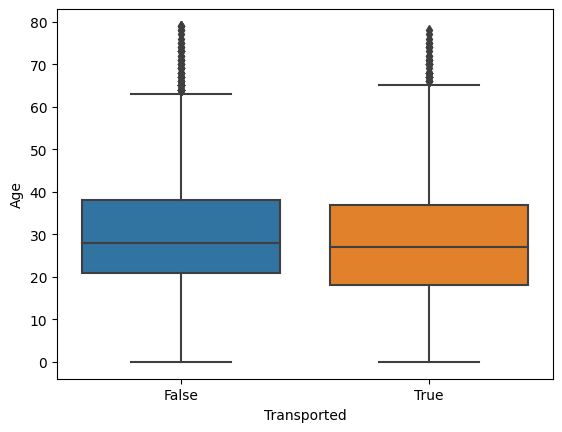

In [29]:
sns.boxplot(x='Transported', y='Age', data=train_data)

---
The Ages will be group into two groups ie young and old

---

In [30]:
bins = np.linspace(train_data['Age'].min(), train_data['Age'].max(), 3)
bins

array([ 0. , 39.5, 79. ])

In [31]:
labels = ['young', 'old']
train_data['Age'] = pd.cut(train_data['Age'], bins=bins, labels=labels, include_lowest=True)

In [32]:
train_data.head()

PassengerId HomePlanet  CryoSleep  Cabin  Destination    Age    VIP  \
0     0001_01     Europa      False  B/0/P  TRAPPIST-1e  young  False   
1     0002_01      Earth      False  F/0/S  TRAPPIST-1e  young  False   
2     0003_01     Europa      False  A/0/S  TRAPPIST-1e    old   True   
3     0003_02     Europa      False  A/0/S  TRAPPIST-1e  young  False   
4     0004_01      Earth      False  F/1/S  TRAPPIST-1e  young  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [33]:
test_data['Age'] = pd.cut(test_data['Age'], bins=bins, labels=labels, include_lowest=True)

In [34]:
test_data.head()

PassengerId HomePlanet  CryoSleep  Cabin  Destination    Age    VIP  \
0     0013_01      Earth       True  G/3/S  TRAPPIST-1e  young  False   
1     0018_01      Earth      False  F/4/S  TRAPPIST-1e  young  False   
2     0019_01     Europa       True  C/0/S  55 Cancri e  young  False   
3     0021_01     Europa      False  C/1/S  TRAPPIST-1e  young  False   
4     0023_01      Earth      False  F/5/S  TRAPPIST-1e  young  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

## Step 5: Exploratory Data Analysis and Feature Engineering
---

This will be done in 2 steps

1. Feature Engineering part 1

2. Exploratory Data Analysis

3. Feature Engineering part 2

### 5.1 Feature Engineering Part 1
---

In [35]:
train_data.head()

PassengerId HomePlanet  CryoSleep  Cabin  Destination    Age    VIP  \
0     0001_01     Europa      False  B/0/P  TRAPPIST-1e  young  False   
1     0002_01      Earth      False  F/0/S  TRAPPIST-1e  young  False   
2     0003_01     Europa      False  A/0/S  TRAPPIST-1e    old   True   
3     0003_02     Europa      False  A/0/S  TRAPPIST-1e  young  False   
4     0004_01      Earth      False  F/1/S  TRAPPIST-1e  young  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

**These are some of the feature engineering that will be done on the data :**

1. Passenger ID - This column will be dropped.

2. Cabin - The deck and side will be xtracted from the cabin column.

3. RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - These columns will be added up and combined into one called 'ammenities'

4. Name - This column will be dropped.

#### 5.1.1 Passenger ID and Name Columns
---

In [36]:

def drops_col(df):
    """
    The folllowing function drops the passengeriD and Name columns from a dataframe
    and returns the dataframe
    """   
    df.drop('PassengerId', axis=1, inplace=True)
    df.drop('Name', axis=1, inplace=True)
    
    return df
    

In [39]:
fe_train_data = drops_col(train_data)
fe_test_data = drops_col(test_data)

#### 5.1.2 Cabin Column
---

In [63]:
def cabin_col(df):
    """
    The function takes in a dataframe, splits the cabin column into two the cabin deck and cabin side
    it appends the two into the dataframe, drops the cabin column and returns the dataframe
    """
    cabin_list = df['Cabin'].to_list()
    deck = []
    side = []
    
    for i in cabin_list:
        deck.append(i.split('/')[0])
        side.append(i.split('/')[-1])
        
    df['cabin_deck'] = deck
    df['cabin_side'] = side
    
    df.drop('Cabin', axis=1, inplace=True)
    
    return df

In [64]:
fe_train_data = cabin_col(fe_train_data)
fe_test_data = cabin_col(fe_test_data)

#### 5.1.3 RoomService, FoodCourt, ShoppingMall, Spa and VRDeck Columns
---

In [72]:
def total_ammenities(df):
    """
    The following takes in a dataframe and adds all the ammenties used into one column called amenities,
    drops the individual ammenities and returns the dataframe
    """
    df['total_amenities'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
    
    df.drop('RoomService', axis = 1, inplace = True)
    df.drop('FoodCourt', axis = 1, inplace = True)
    df.drop('ShoppingMall', axis = 1, inplace = True)
    df.drop('Spa', axis = 1, inplace = True)
    df.drop('VRDeck', axis = 1, inplace = True)
    
    return df
    

In [73]:
fe_train_data = total_ammenities(fe_train_data)
fe_test_data = total_ammenities(fe_test_data)

### 5.2 Exploratory Data Analysis
---

#### Chi-Square Test

**Since Most of the data is categorical we will use chi-squared test to show the relationship between the features and the trarget**

The chi-squre test shows the relationship between two categorical variables.

If the p-value < 0.05 the null hypothesis is rejected that the two variables are independent and concludes that there is evidence of association between the variables

In [96]:
fe_train_data.head()

HomePlanet  CryoSleep  Destination    Age    VIP  Transported cabin_deck  \
0     Europa      False  TRAPPIST-1e  young  False        False          B   
1      Earth      False  TRAPPIST-1e  young  False         True          F   
2     Europa      False  TRAPPIST-1e    old   True        False          A   
3     Europa      False  TRAPPIST-1e  young  False        False          A   
4      Earth      False  TRAPPIST-1e  young  False         True          F   

  cabin_side  total_amenities  
0          P              0.0  
1          S            736.0  
2          S          10383.0  
3          S           5176.0  
4          S           1091.0

**Home Planet Chi-Square Test**

In [123]:

hp_cont_table = pd.crosstab(fe_train_data['HomePlanet'], fe_train_data['Transported'])
hp_p_value = stats.chi2_contingency(hp_cont_table, correction=True)[1]

if hp_p_value < 0.05:
    print('The p_value is ', hp_p_value, 'There is evidence of association between the variables')
else:
    print('The p_value is ', hp_p_value, 'There is no evidence of association between the variables')    

The p_value is  5.549631517016863e-70 There is evidence of association between the variables


**CryoSleep Chi-Square Test**

In [125]:
cs_cont_table = pd.crosstab(fe_train_data['CryoSleep'], fe_train_data['Transported'])
cs_p_value = stats.chi2_contingency(cs_cont_table, correction=True)[1]

if cs_p_value < 0.05:
    print('The p_value is ', cs_p_value, 'There is evidence of association between the variables')
else:
    print('The p_value is ', cs_p_value, 'There is no evidence of association between the variables') 

The p_value is  0.0 There is evidence of association between the variables


**Destination Chi-Square Test**

In [127]:
d_cont_table = pd.crosstab(fe_train_data['Destination'], fe_train_data['Transported'])
d_p_value = stats.chi2_contingency(d_cont_table, correction=True)[1]

if d_p_value < 0.05:
    print('The p_value is ', d_p_value, 'There is evidence of association between the variables')
else:
    print('The p_value is ', d_p_value, 'There is no evidence of association between the variables') 

The p_value is  1.1947894351445014e-23 There is evidence of association between the variables


**Age Chi-Square Test**

In [128]:
ag_cont_table = pd.crosstab(fe_train_data['Age'], fe_train_data['Transported'])
ag_p_value = stats.chi2_contingency(ag_cont_table, correction=True)[1]

if ag_p_value < 0.05:
    print('The p_value is ', ag_p_value, 'There is evidence of association between the variables')
else:
    print('The p_value is ', ag_p_value, 'There is no evidence of association between the variables') 

The p_value is  0.5743217143672246 There is no evidence of association between the variables


**VIP Chi-Square Test**

In [129]:
vip_cont_table = pd.crosstab(fe_train_data['VIP'], fe_train_data['Transported'])
vip_p_value = stats.chi2_contingency(vip_cont_table, correction=True)[1]

if vip_p_value < 0.05:
    print('The p_value is ', vip_p_value, 'There is evidence of association between the variables')
else:
    print('The p_value is ', vip_p_value, 'There is no evidence of association between the variables') 

The p_value is  0.0006681023600149099 There is evidence of association between the variables


**Cabin Deck Chi-Square Test**

In [130]:
cd_cont_table = pd.crosstab(fe_train_data['cabin_deck'], fe_train_data['Transported'])
cd_p_value = stats.chi2_contingency(cd_cont_table, correction=True)[1]

if cd_p_value < 0.05:
    print('The p_value is ', cd_p_value, 'There is evidence of association between the variables')
else:
    print('The p_value is ', cd_p_value, 'There is no evidence of association between the variables') 

The p_value is  8.352488438720223e-80 There is evidence of association between the variables


**Cabin Side Chi-Square Test**

In [131]:
cs_cont_table = pd.crosstab(fe_train_data['cabin_side'], fe_train_data['Transported'])
cs_p_value = stats.chi2_contingency(cs_cont_table, correction=True)[1]

if cs_p_value < 0.05:
    print('The p_value is ', cs_p_value, 'There is evidence of association between the variables')
else:
    print('The p_value is ', cs_p_value, 'There is no evidence of association between the variables') 

The p_value is  1.3690336728997533e-20 There is evidence of association between the variables


**Total Amenities Box Plot**

Text(0.5, 1.0, 'Relationship Between Total Amount Spent on Amenities and Transported')

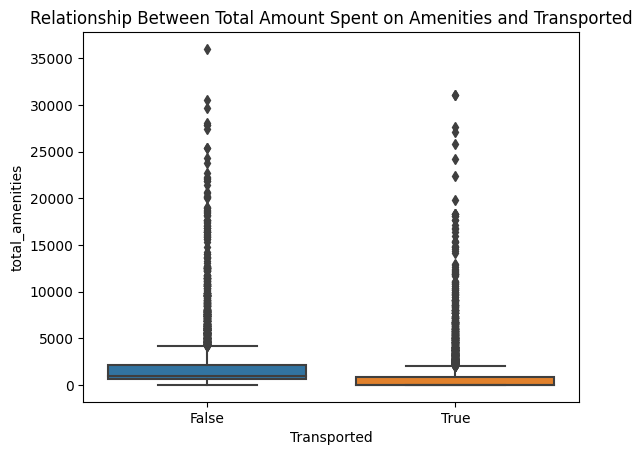

In [133]:
sns.boxplot(x='Transported', y='total_amenities', data = fe_train_data)
plt.title('Relationship Between Total Amount Spent on Amenities and Transported')

The above box plot shows that there is a relationship between total ammenities and Transported.

---

### 5.3 Feature Engineering Part 2
---

In this part 2 we will do:

+ Dropping the Age column

+ One-hot encoding

**Droping Age Column**

In [143]:
fe_train_data.drop('Age', axis=1, inplace=True)
fe_test_data.drop('Age', axis=1, inplace=True)

In [145]:
fe_train_data.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported',
       'cabin_deck', 'cabin_side', 'total_amenities'],
      dtype='object')

**One-hot Encoding**

In [146]:
def one_hot_fun(df):
    hp_dum = pd.get_dummies(df['HomePlanet'], prefix='home_planet')
    cr_dum = pd.get_dummies(df['CryoSleep'], prefix='cryo_sleep')   
    ds_dum = pd.get_dummies(df['Destination'], prefix='destination')    
    vip_dum = pd.get_dummies(df['VIP'], prefix='vip')   
    cd_dum = pd.get_dummies(df['cabin_deck'], prefix='cabin_deck') 
    cs_dum = pd.get_dummies(df['cabin_side'], prefix='cabin_side')

    df = pd.concat([df, hp_dum, cr_dum, ds_dum, vip_dum, cd_dum, cs_dum], axis=1)
    
    df.drop(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'cabin_deck', 'cabin_side'],axis=1, inplace=True)
    
    return df

In [147]:
fe_train_data = one_hot_fun(fe_train_data)
fe_test_data = one_hot_fun(fe_test_data)

In [148]:
fe_train_data.head()

Transported  total_amenities  home_planet_Earth  home_planet_Europa  \
0        False              0.0                  0                   1   
1         True            736.0                  1                   0   
2        False          10383.0                  0                   1   
3        False           5176.0                  0                   1   
4         True           1091.0                  1                   0   

   home_planet_Mars  cryo_sleep_False  cryo_sleep_True  \
0                 0                 1                0   
1                 0                 1                0   
2                 0                 1                0   
3                 0                 1                0   
4                 0                 1                0   

   destination_55 Cancri e  destination_PSO J318.5-22  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   destination_TRAPPIST-1e  ...  cabin_deck_B  cabin_deck_C  cabin_deck_D  \
0                        1  ...             1             0             0   
1                        1  ...             0             0             0   
2                        1  ...             0             0             0   
3                        1  ...             0             0             0   
4                        1  ...             0             0             0   

   cabin_deck_E  cabin_deck_F  cabin_deck_G  cabin_deck_T  cabin_side_0  \
0             0             0             0             0             0   
1             0             1             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             1             0             0             0   

   cabin_side_P  cabin_side_S  
0             1             0  
1             0             1  
2             0             1  
3             0             1  
4             0             1  

[5 rows x 24 columns]

In [149]:
fe_test_data.head()

total_amenities  home_planet_Earth  home_planet_Europa  home_planet_Mars  \
0              0.0                  1                   0                 0   
1           2832.0                  1                   0                 0   
2              0.0                  0                   1                 0   
3           7418.0                  0                   1                 0   
4            645.0                  1                   0                 0   

   cryo_sleep_False  cryo_sleep_True  destination_55 Cancri e  \
0                 0                1                        0   
1                 1                0                        0   
2                 0                1                        1   
3                 1                0                        0   
4                 1                0                        0   

   destination_PSO J318.5-22  destination_TRAPPIST-1e  vip_False  ...  \
0                          0                        1          1  ...   
1                          0                        1          1  ...   
2                          0                        0          1  ...   
3                          0                        1          1  ...   
4                          0                        1          1  ...   

   cabin_deck_B  cabin_deck_C  cabin_deck_D  cabin_deck_E  cabin_deck_F  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             0             1             0             0             0   
3             0             1             0             0             0   
4             0             0             0             0             1   

   cabin_deck_G  cabin_deck_T  cabin_side_0  cabin_side_P  cabin_side_S  
0             1             0             0             0             1  
1             0             0             0             0             1  
2             0             0             0             0             1  
3             0             0             0             0             1  
4             0             0             0             0             1  

[5 rows x 23 columns]

In [150]:
fe_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transported                8693 non-null   bool   
 1   total_amenities            8693 non-null   float64
 2   home_planet_Earth          8693 non-null   uint8  
 3   home_planet_Europa         8693 non-null   uint8  
 4   home_planet_Mars           8693 non-null   uint8  
 5   cryo_sleep_False           8693 non-null   uint8  
 6   cryo_sleep_True            8693 non-null   uint8  
 7   destination_55 Cancri e    8693 non-null   uint8  
 8   destination_PSO J318.5-22  8693 non-null   uint8  
 9   destination_TRAPPIST-1e    8693 non-null   uint8  
 10  vip_False                  8693 non-null   uint8  
 11  vip_True                   8693 non-null   uint8  
 12  cabin_deck_0               8693 non-null   uint8  
 13  cabin_deck_A               8693 non-null   uint8

In [151]:
fe_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   total_amenities            4277 non-null   float64
 1   home_planet_Earth          4277 non-null   uint8  
 2   home_planet_Europa         4277 non-null   uint8  
 3   home_planet_Mars           4277 non-null   uint8  
 4   cryo_sleep_False           4277 non-null   uint8  
 5   cryo_sleep_True            4277 non-null   uint8  
 6   destination_55 Cancri e    4277 non-null   uint8  
 7   destination_PSO J318.5-22  4277 non-null   uint8  
 8   destination_TRAPPIST-1e    4277 non-null   uint8  
 9   vip_False                  4277 non-null   uint8  
 10  vip_True                   4277 non-null   uint8  
 11  cabin_deck_0               4277 non-null   uint8  
 12  cabin_deck_A               4277 non-null   uint8  
 13  cabin_deck_B               4277 non-null   uint8

## STEP 6: Model Selection, Evaluation and Refinement
---
I will be using the following models:

1. RandomForestClassifier

2. XGBClassifier

The models will be evaluated using Confusion matrix and F1 score